In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


**Library**

In [140]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings

**Read data**

In [141]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [142]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [143]:
df.info()
#we can see from the output that there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


**Test Train Split**

In [144]:
X = df.drop(['customer name','customer e-mail','country','car purchase amount','gender'],axis=1)
y = df[['car purchase amount']]

In [145]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_scaled = MMS.fit_transform(X)
Y_scaled = MMS.fit_transform(y.values.reshape(-1,1))
X_scaled.shape

(500, 4)

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)
X_train.shape

(375, 4)

In [147]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[4]),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1,activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [148]:
history = model.fit(X_train, y_train, batch_size=16,validation_split=0.2,epochs=50)

Epoch 1/50
19/19 [==============================] - 1s 12ms/step - loss: 0.1486 - val_loss: 0.0366
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.0097
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.0105
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.0057
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.0048
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.0043
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.0046
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.0034
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0031
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.0047
Epoch 11/50
19/19 

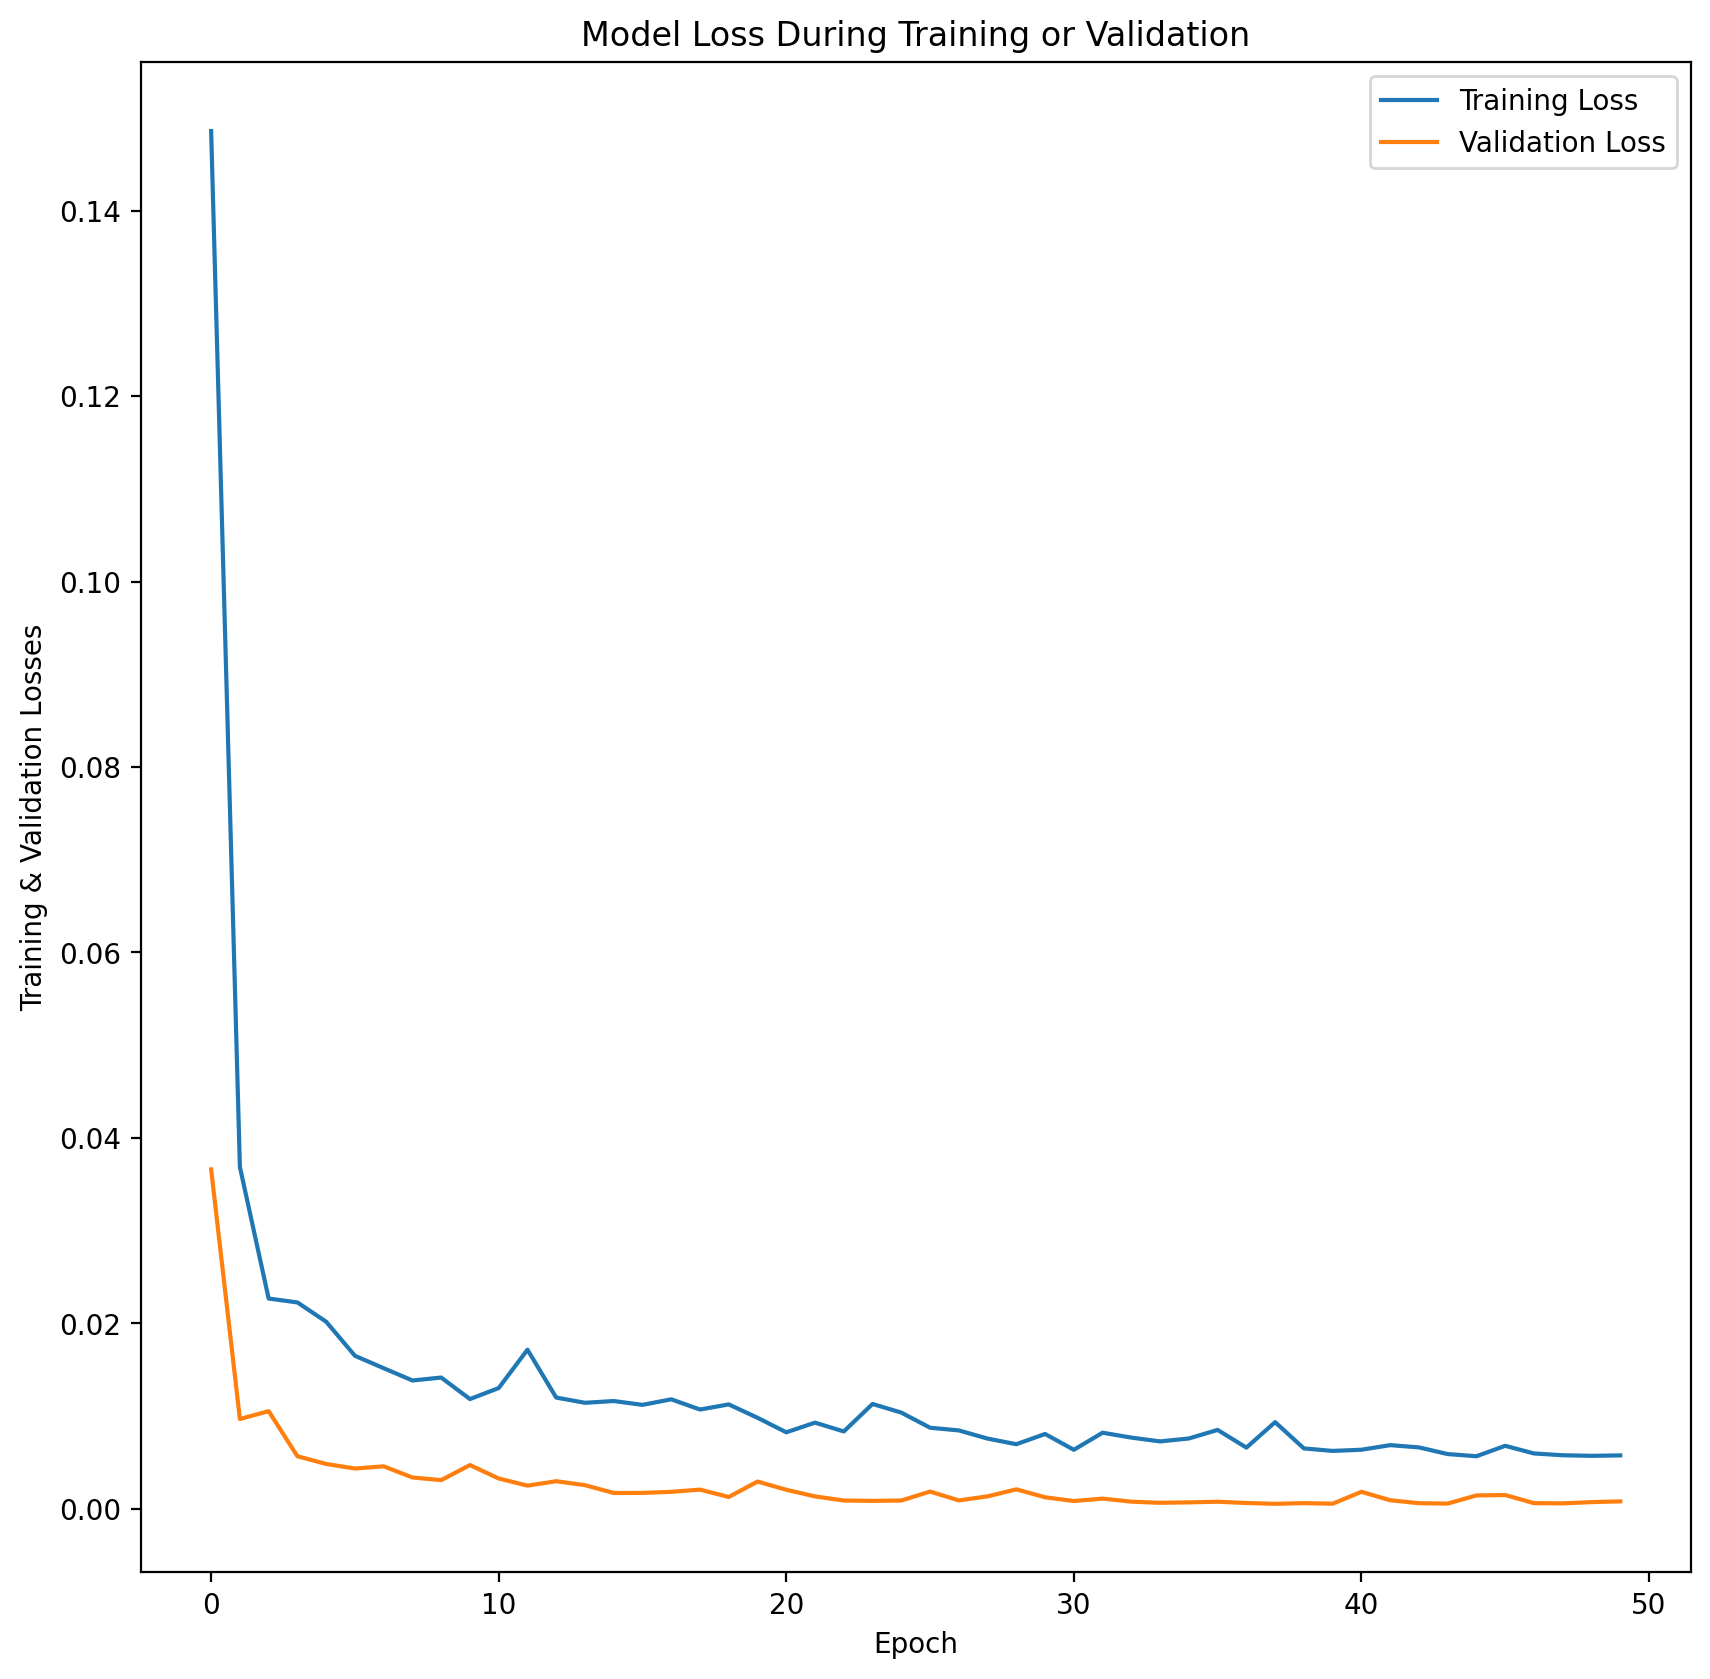

In [149]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [150]:
loss = model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 2ms/step - loss: 4.1863e-04
0.000418626528698951


In [151]:
X_random_sample = np.array([[ 55, 65000, 11600, 562341]])
y_predict = model.predict(X_random_sample)
print('Predicted Purchase Amount is =', y_predict[:,0])

Predicted Purchase Amount is = [177358.28]


In [153]:
def plot_diff(y_true, y_pred, title=''):
    plt.figure(figsize=(4,4),dpi=150)
    plt.scatter(y_true, y_pred,color='blue')
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-10, 10], [-10, 10],color='red')
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.figure(figsize=(4,4),dpi=150)
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

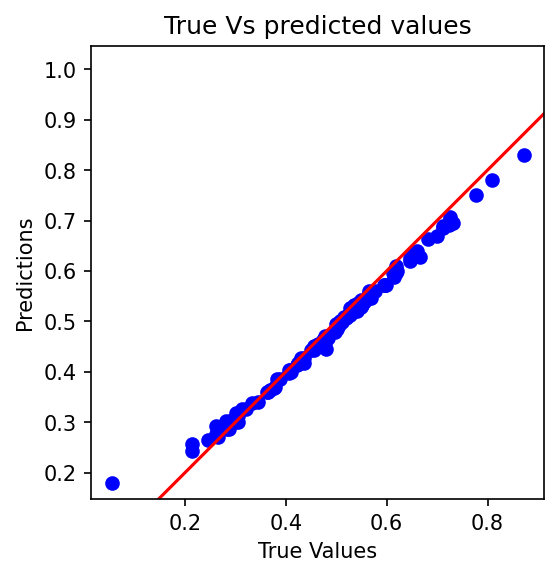

In [154]:
Y_pred = model.predict(X_test)
plot_diff(y_test, Y_pred, title='True Vs predicted values')